

# Prediction How is Diamond Priced Based on its Attributes


<font color='green'>
    
  ## SDAIA T5 DataScience Online Bootcamp Project
   ### Name: Amal Almuteb


<img src="Gifs animados Diamante 1.gif" alt="Drawing" style="width: 200px;"/>


    
# introduction:

In order to fully understand how the pricing system of diamonds worked, it was imperative to collect data on the features taken into account for pricing diamonds as well as their prices. Then, the dataset was further analyzed to build graphs highlighting important qualities of a diamond. Finally, a predictive model was created to predict the prices of diamonds.



## Dataset Description

#### Diamonds dataset hosted on Kaggle. and contains 53940 rows and 11 colmun.

##### Columns represent:
- __'Unnamed:__ 0' - ID of the diamond
- __Cara__t - Measures weight of the diamond , 1 carat = 200 mg 
- __x, y, z__ - Length, width and height of the diamond respectively

- __Cut__ - Identifies quality of the cut (Ideal to Fair)
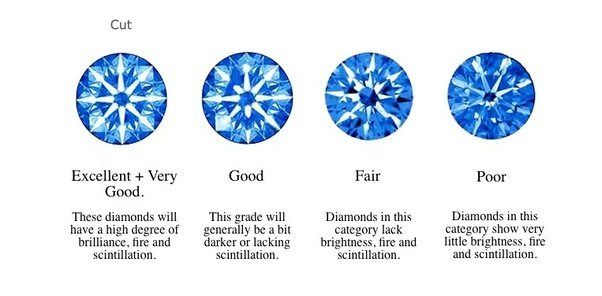

- __Color__ - Identifies color of the diamond (D - Best to J - Worst)
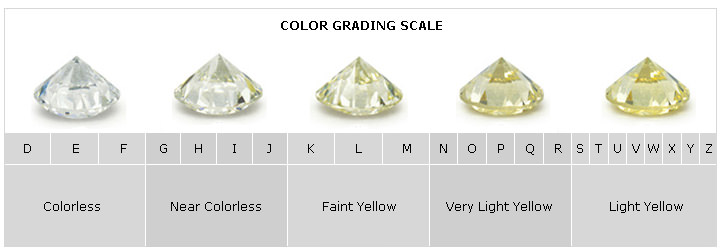 <br>


- __Clarity__ - Measures the clarity of the diamond (IF - Best, I1 - Worst)
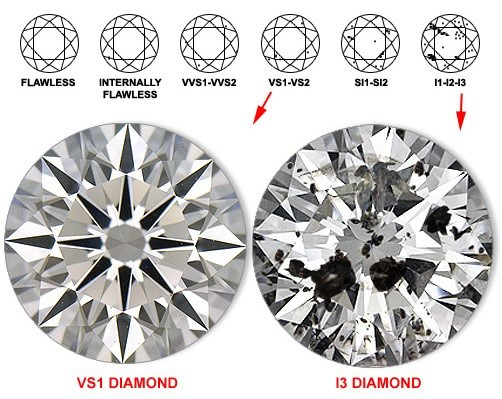

- __Table__ - Width of top of diamond relative to its widest point
- __depth__, Value derived from width and height of the diamond <br>
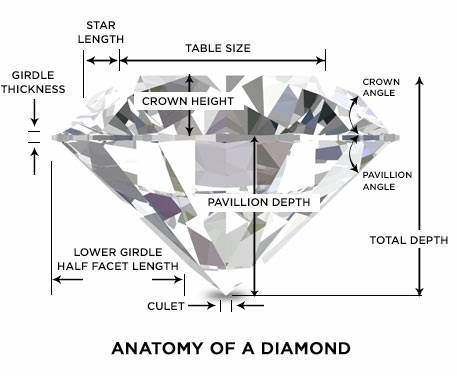 <br>

- __Price__ - Price of the diamond



# Importing libraries

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [145]:
# to load the dataset we will be using pd.read_csv()function and it will convert the dataset to a dataframe 

df = pd.read_csv('diamonds.csv')

In [146]:
##look into the top 5 rows of dataset using pd.head() function

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Preprocessing and cleaning

In [147]:
# Number of rows and columns
df.shape

(53940, 11)

In [148]:
# checking for missing values
# Info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [149]:
# Get the descriptive statistics of the dataset
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Observations:

- There are no missing values in the dataset
- Continous/Numerical variables are: "carat","depth","table","price",'x', 'y','z'
- Categorical variables are: 'cut','color', 'clarity'
- We can delete the IDs column as it provides no useful statistics.
- In the minimum value of x ,y and z is zero and It doesn’t make any sense to have length\width\depth of a diamond to be zero, so we can drop these rows
- The Price column is the dependent column and all others are independent columns
##### Because the Target ( price ) is a continous datatype, we should use "Supervised linear regression model

In [150]:
#Drop the column “Unnamed: 0” and depth, which is unnecessary
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [151]:
#count the number of row has zero value 
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [152]:
# drop rows have zero value
df = df[(df[['x','y','z']] != 0).all(axis=1)]

# Exploratory Data Analysis (EDA)

* ### Numerical Analysis ( Target variable vs remaing continous variables)

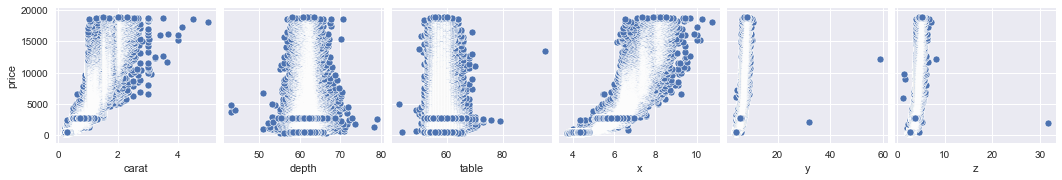

In [153]:
sns.pairplot(data=df,x_vars=['carat', 'depth','table','x', 'y','z'],y_vars='price',diag_kind=None)

#### Clearly there is good linear relationship between Length, Width, Height and Carat with price variables.

## Correlation between feature

In [154]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


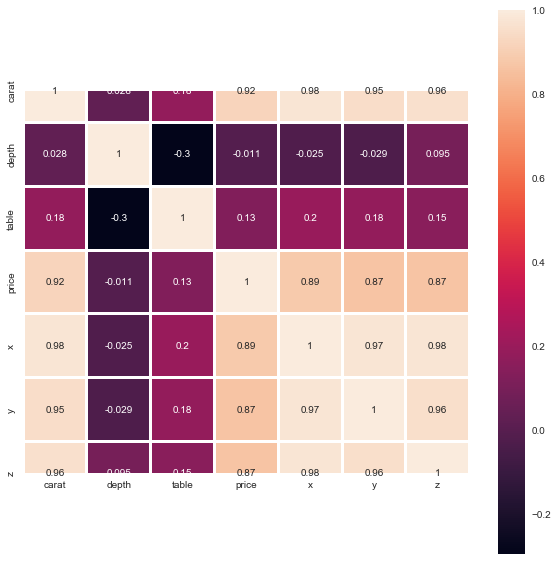

In [155]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)

#### Take aways from heatmap:
- Correlation coefficient between price with carat and price with dimensions are high (0.9 above). 
That means features carat and dimensions of the diamond highly affect the target diamond price. 
- The features x,y,z also show high coorelation coefficient among each other.
So they can be combined into one feature.
- The Depth is inversely related to Price.
Why ? scientifically this is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
- Self Relation ie. of a feature to itself is 1 as expected.


However, the categorical data is not taken into account. Since these categories are considered as essential factors for pricing the diamond, therefore, we will compare each category feature with the price.

#### PRICE ~ CARAT

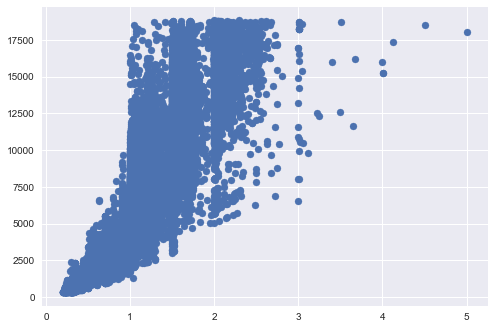

In [156]:
plt.scatter(df.carat,df.price)

### FEATURE ENGINEERING

In [157]:
# combine x,y,z into one feature.
df['volume'] = df['x']*df['y']*df['z']


In [158]:
#drop x,y,z colum
df.drop(['x','y','z'], axis=1, inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


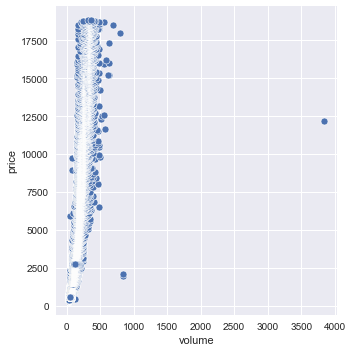

In [159]:
sns.relplot(x='volume',y='price',data=df)

* ### Catogerical Analysis ( Target variable vs remaing catogeries variables)

In [160]:
#check each of the unique values present in the catogery features
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


### How catogeries variables are affecting the price of the Dimaond?

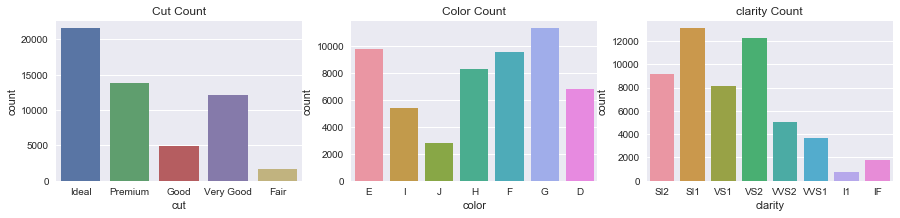

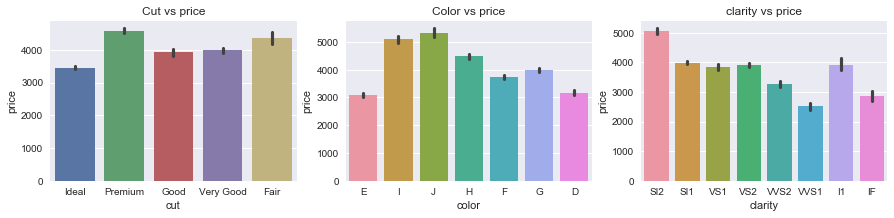

In [170]:
# we will see first the count for each catogary

plt.figure(figsize=[15,10])

plt.subplot(3,3,1)
plt.title('Cut Count')
sns.countplot(data = df, x='cut');

plt.subplot(3,3,2)
plt.title('Color Count')
sns.countplot(data = df, x='color');

plt.subplot(3,3,3)
plt.title('clarity Count')
sns.countplot(data = df, x='clarity');

plt.figure(figsize=[15,10])
plt.subplot(3,3,1)
plt.title('Cut vs price')
sns.barplot(data = df, x='cut', y='price');
plt.subplot(3,3,2)
plt.title('Color vs price')
sns.barplot(data = df, x='color', y='price');
plt.subplot(3,3,3)
plt.title('clarity vs price')
sns.barplot(data = df, x='clarity', y='price');

##### Take aways from Countblot:
__Cut type__
- Even Ideal cut type diamonds are high in the dataset, it doesn't have high price in total.
- Even Fair diamonds are least in the dataset, it secures 2nd position in total price distribution of cut category.
- Premium cut type diamonds in the dataset have high price in total.<br>

__Color type__
- J type has least in number of diamonds in dataset, but it has high price in total price distribution.
- G type are maximum in number in dataset but it doesnot have high price in total price distribution in the dataset.<br>

__Clarity type__
- L1 diamonds are least in number in the dataset but it considerably has high price in total price distribution of clarity type diamonds.
- Sl1 diamonds are maximum in the dataset but it doesn't have high price in total price distribution of clairty type diamonds.

## Converting categorical variable to numeric

#### Since our data categories has order value which called "ordinal scale" we will use Label encoder to convert the categorical data into numerical as the regression-based machine learning algorithms will predict the continuous data based on the other feature of type continuous.

In [74]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,3,2,1,3,83,30,0,150
1,1,3,1,2,66,90,0,15
2,3,1,1,4,37,115,1,135
3,9,3,5,5,92,60,2,996
4,11,1,6,3,101,60,3,2107


## Training and Testing Split

In [75]:
# import requierd libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [76]:
#split the data into training and testing sets.
y = df['price']
X = df.drop(["price"], axis= 1).astype(float)

In [77]:
#Use scikitlearn's train_test_split to create train and test files.
#The test size=0.3 represents that 30% of X and Y dataframes goes to the test files.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
x_test.head()

,carat,cut,color,clarity,depth,table,volume
50904,52.0,2.0,3.0,2.0,88.0,40.0,11328.0
5302,81.0,3.0,1.0,3.0,86.0,90.0,15845.0
30152,12.0,3.0,1.0,2.0,96.0,50.0,2174.0
23991,92.0,3.0,0.0,7.0,66.0,60.0,20937.0
17935,80.0,3.0,2.0,4.0,94.0,60.0,17232.0


## MODELLING

### - Using Linear Regression Model :

In [118]:
Lreg = LinearRegression()
Lreg.fit(x_train,y_train)
Lerg_score = Lreg.score(x_train, y_train)
prediction = Lreg.predict(x_test)
rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction))
r2_Lreg = r2_score(y_test, prediction)
Lreg.intercept_
print('Score value is = {}'.format(Lerg_score))
print('R-squared value is {}'.format(r2_Lreg))
print('RMSE value is = {}'.format(rmse_Lreg))

Score value is = 0.9172785263839015
R-squared value is 0.9166529687435219
RMSE value is = 866.0265999468861


__The R_seguerd is very close and almost identiacl for trainig data and we can say here it is just afitiing 
the performance in traing set as just the performance in testing set__

In [125]:
# calclaute the adj R Sequare 
#for trainig set
adj_r = 1 - (1-(0.9172785263839015))*(len(y)-1)/(len(y)-X.shape[1]-1 )
adj_r

0.9172677857266209

In [135]:
# calclaute the adj R Sequare 
#for trainig set
adj_r = 1 - (1-0.9172785263839015)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adj_r)
#for testing set
adj_r2 =  1 - (1-0.9166529687435219)*(len(y)-1)/(len(y)-X.shape[1]-1)
print (adj_r2)

0.9172677857266209
0.9166421468630723


## The Model Result

In [104]:
Result= pd.DataFrame({'Actual Price':y_test,'Predicted Price By LinReg':prediction})
Result.head(20)

,Actual Price,Predicted Price By LinReg
50904,1872,2228.262695
5302,3286,4410.349810
30152,375,-238.538126
23991,9202,6770.344956
17935,6308,4661.819414
21337,7812,5967.649683
20045,280,883.542896
7715,235,188.103322
25377,297,466.554454
12335,4627,5345.059290


In [141]:
coeffecients = pd.DataFrame(Lreg.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
carat,47.795079
cut,53.237632
color,-187.113221
clarity,218.405967
depth,-5.322196
table,-5.902784
volume,0.096226


## Business Insights:

__R_squreed is 0.91 which tells the corelation between price vs different independent varaiables explained by 91%__


- A one unit increase in carat will increase of 47 dollars in price.holding all the other features constant
- A one unit increase in cut will increase  53.59 dollars in price,holding all the other features constant
- A one unit increase in color will decrease of 187 dollars in price, holding all the other features constant
- A one unit increase in Clarity will increase of 218.40 dollars in price, holding all the other features constant
- A one unit increase in depth will decrase of 5.32 dollars in price, holding all the other features constant
- A one unit increase in table will decrase of 5.32 dollars in price, holding all the other features constant
- A one unit increase in depth will decrase of 5.32 dollars in price, holding all the other features constant



. Finally, Our linear model is good as the r-square difference in train & test dataset is less than 5%.

### -By Random Forest Regression :

In [84]:
RFreg = RandomForestRegressor()
RFreg.fit(x_train,y_train)
RFreg_score = RFreg.score(x_train, y_train)
prediction2 = RFreg.predict(x_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))
r2_RFreg = r2_score(y_test, prediction2)

print('Score value is = {}'.format(RFreg_score))
print('R-squared value is {}'.format(r2_RFreg))
print('RMSE value is = {}'.format(rmse_RFreg))

/Users/yazeed/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score value is = 0.9975324455266334
R-squared value is 0.9870902097331336
RMSE value is = 340.8362334293168


In [105]:
Result= pd.DataFrame({'Actual Price':y_test,'Predicted Price By LinReg':prediction,'Predicted Price By RandForest':prediction2})
Result.head(20)

,Actual Price,Predicted Price By LinReg,Predicted Price By RandForest
50904,1872,2228.262695,2385.400000
5302,3286,4410.349810,3533.660000
30152,375,-238.538126,328.100000
23991,9202,6770.344956,8953.686667
17935,6308,4661.819414,6000.200000
21337,7812,5967.649683,8565.600000
20045,280,883.542896,410.200000
7715,235,188.103322,309.800000
25377,297,466.554454,376.100000
12335,4627,5345.059290,4164.900000


# Thank You!

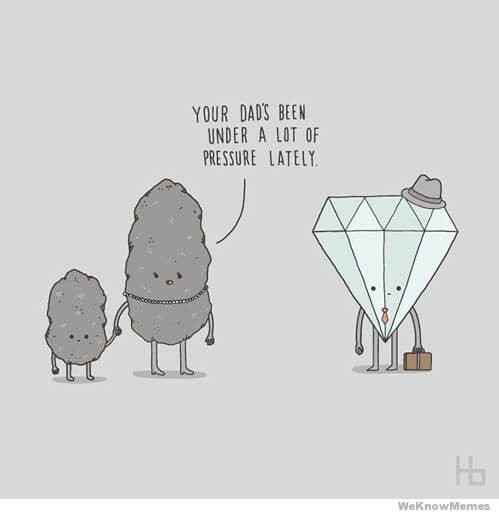